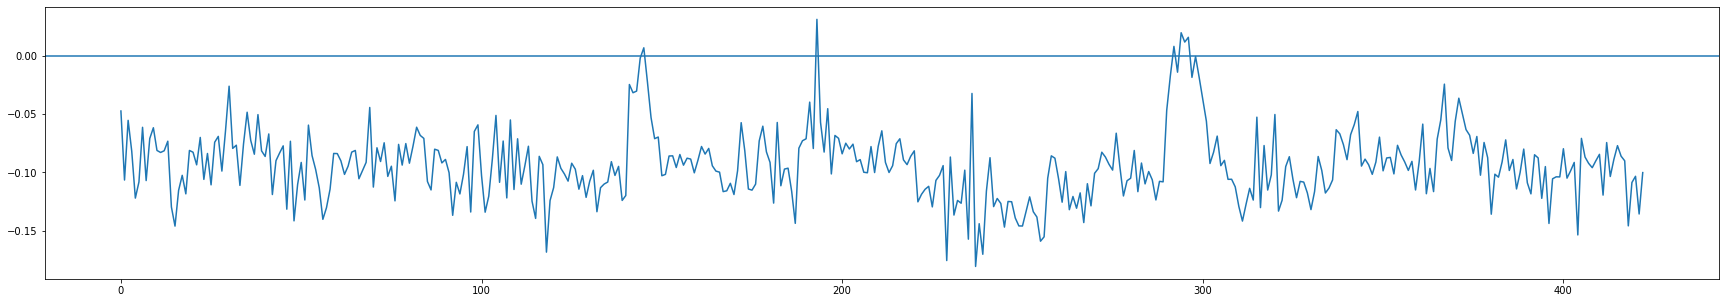

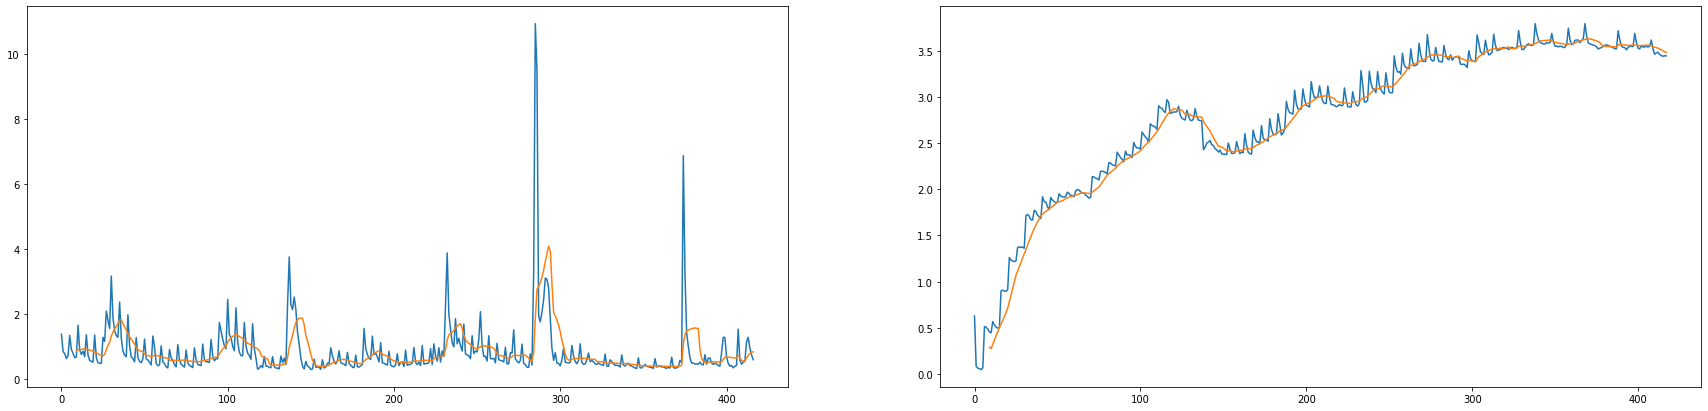

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from IPython.display import clear_output
import time
from collections import deque
def read_log(p):
    file1 = open(p)
    text = file1.read()
    file1.close()

    x = [float(x) for x in text.split("\n")[0:] if x != "" and not np.isnan(float(x))]
    x2 = []
    past_10 = deque(maxlen = 10)
    past_10.append(x[0])
    for i in x:
        mean = np.mean([abs(g) for g in past_10])
        if len(x2) > 1:
            if abs(i - x2[-1]) < abs(mean)*1000:
                x2.append(i)
                past_10.append(i)
            else:
                print(i, "is error")
        else:
            x2.append(i)
    return x2

rewards = read_log("logs/rewards_log.txt")
fig, ax = plt.subplots(1,1,figsize=(30,5))
ax.plot(rewards)
ax.axhline(y=0)

s=10

x = read_log("logs/loss_log.txt")
x = [i for i in x if i != 0]
x1=[np.average(x[i-s+1:i+1])for i in tqdm(range(0,len(x)))]
#x2=[np.average(x[max(0,i-s2+1):i+1])for i in tqdm(range(s,len(x)))]


y = read_log("logs/qv_log.txt")
y = [i for i in y if i != 0]
y1=[np.average(y[i-s+1:i+1])for i in tqdm(range(0,len(y)))]

clear_output()
fig, ax = plt.subplots(1,2,figsize=(30,7))
#ax[0].set_ylim(0,3)
ax[0].plot(x)
ax[0].plot(x1)
#ax[0].plot(x2)
#ax[1].set_ylim(1,3)
ax[1].plot(y)
ax[1].plot(y1)


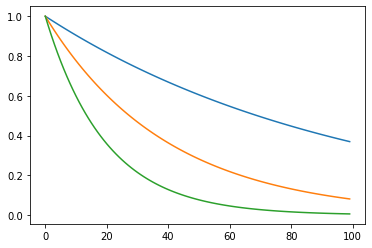

In [2]:
plt.plot([0.99**x for x in range(100)])
plt.plot([0.975**x for x in range(100)])
plt.plot([0.95**x for x in range(100)])

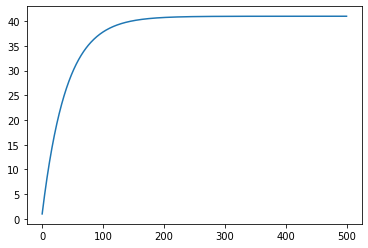

In [3]:
e = 1
g = 0.975
x = [e]
for i in range(500):
    x.append(x[-1]+e*g**i)
plt.plot(x)